In [1]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt

## things left to do for this analysis:

- update when we update the wasting model
- compare actual wasting risk exposure distributions rather than SEVs across these locations
- plot the colorful bar charts for each age group rather than just 12-23 months
- make violin plots to compare all of the colored groupings of studies in the KI database

The purpose of this notebook is to evaluate the study/site-specific wasting transition rates from the BMGF KI database with the aim of identifying rates that are most generalizable to the general population of Ethiopia so that we can use them as an external validation source.

For reference, the child wasting SEV for relevant countries included in the KI database studies from GBD is shown below.
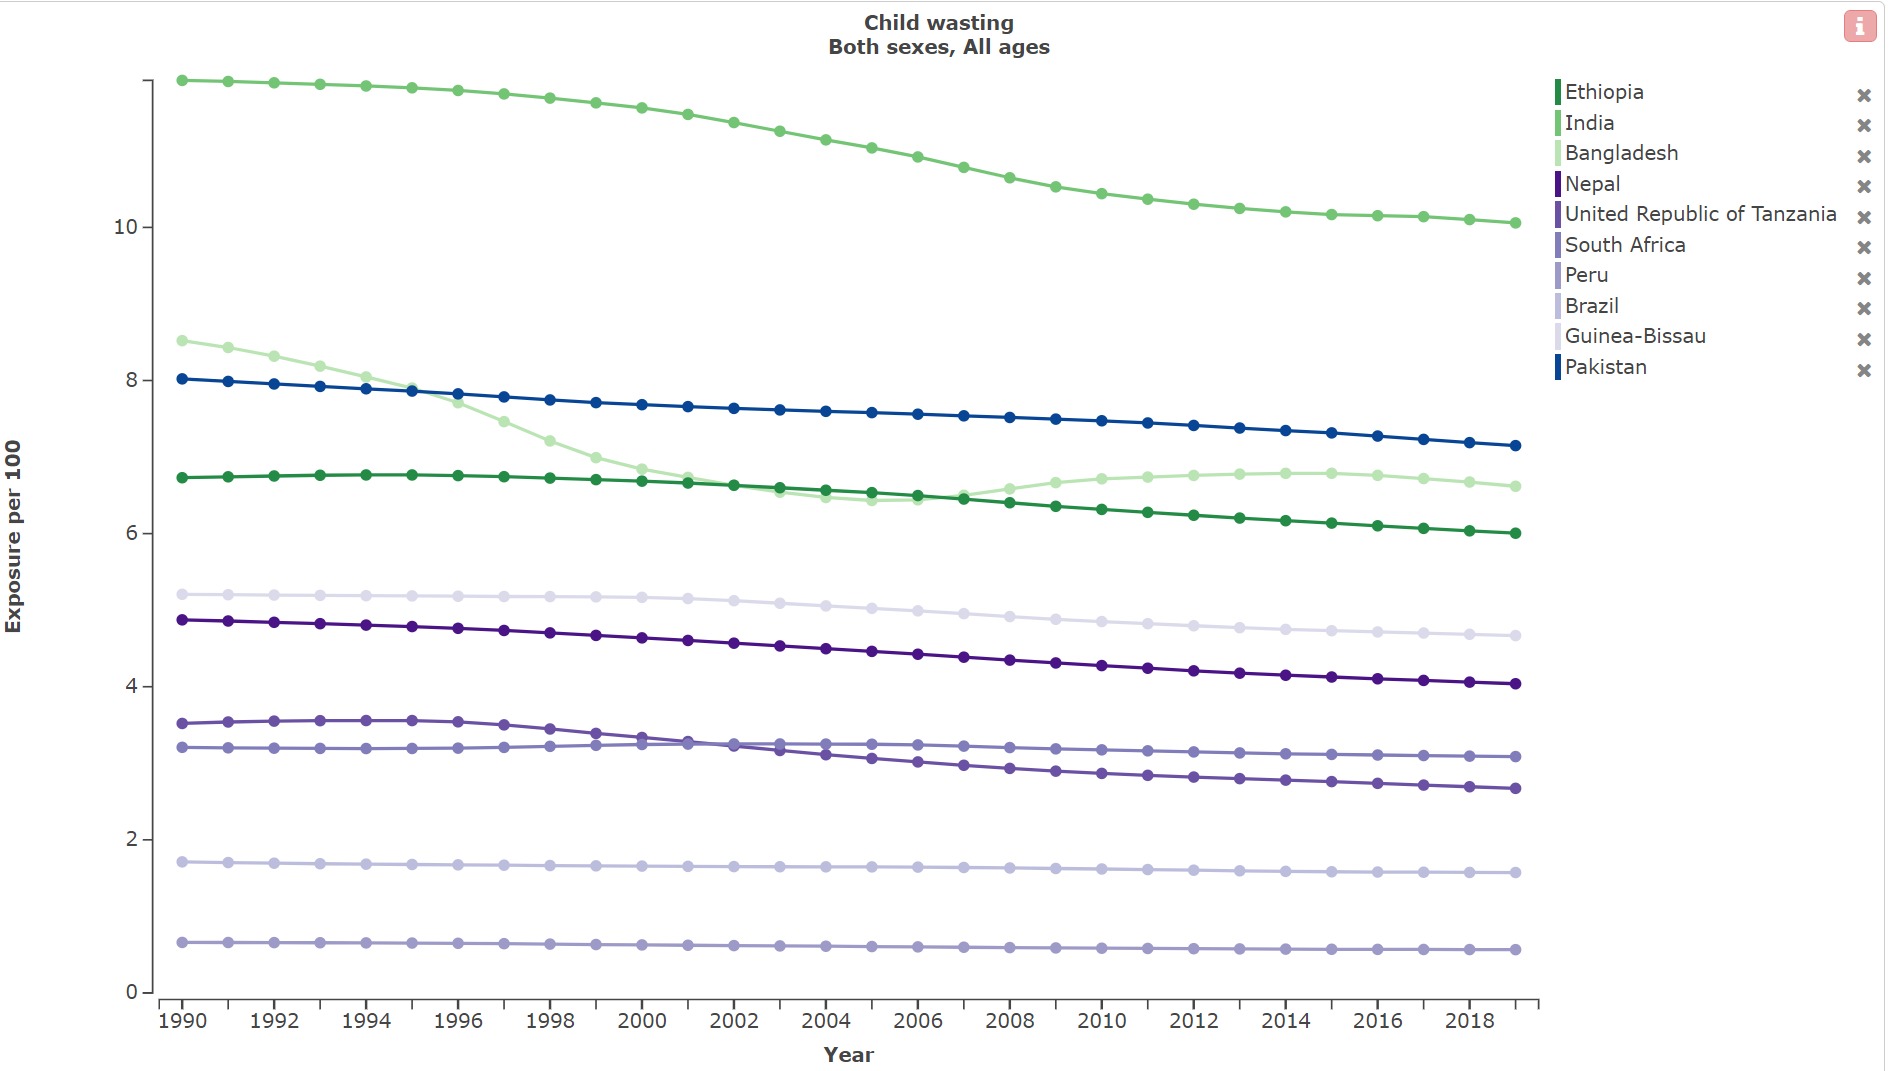
Ethiopia is shown as the darkest green just above 6. The closest countires (in order) to Ethiopia are Bangladesh, Pakistan, Guinea-Bissau, and Nepal


NOTE: also will want to compare actual wasting risk exposure distributions between these locations rather than just the SEV

In [2]:
# load in KI data

ki = pd.read_csv('wasting transition rates.csv')
ki['severe_to_all_less_severe'] = ki.severe_to_non + ki.severe_to_mild + ki.severe_to_non
ki['moderate_to_all_less_severe'] = ki.moderate_to_mild + ki.moderate_to_non
ki['non_to_all_more_severe'] = ki.non_to_mild + ki.non_to_moderate + ki.non_to_severe
ki['mild_to_all_more_severe'] = ki.mild_to_moderate + ki.mild_to_severe
ki['r_severe_all'] = ki.severe_to_all_less_severe / ki.severe_time
ki['r_moderate_all'] = ki.moderate_to_all_less_severe / ki.moderate_time
ki['i_none_all'] = ki.non_to_all_more_severe / ki.non_wasted_time
ki['i_mild_all'] = ki.mild_to_all_more_severe / ki.mild_time
ki.head()

,study_id,study_site,country_iso2,age_group,time,non_wasted_time,mild_time,moderate_time,severe_time,non_to_mild,...,r_severe_non,r_severe_mild,severe_to_all_less_severe,moderate_to_all_less_severe,non_to_all_more_severe,mild_to_all_more_severe,r_severe_all,r_moderate_all,i_none_all,i_mild_all
0,AKU_EE,AKU-EE PK,PK,<27 days,5241,3583,994,463,201,11,...,0.009950,0.000000,4,10,12,5,0.019900,0.021598,0.003349,0.005030
1,AKU_EE,AKU-EE PK,PK,1 to 5 months,56444,40810,10099,4149,1386,169,...,0.005772,0.002165,19,65,197,60,0.013709,0.015666,0.004827,0.005941
2,AKU_EE,AKU-EE PK,PK,6 to 12 months,69187,41677,17913,7142,2455,129,...,0.000407,0.002444,8,90,132,77,0.003259,0.012602,0.003167,0.004299
3,AKU_EE,AKU-EE PK,PK,1 to 4 years,125874,61944,41467,17782,4681,224,...,0.000000,0.000427,2,140,232,165,0.000427,0.007873,0.003745,0.003979
4,UCDNUT_BFA_ZN,UCDNut_Zn BF,BF,1 to 4 years,148411,75718,50105,18881,3707,72,...,0.000270,0.001619,8,51,81,55,0.002158,0.002701,0.001070,0.001098


In [3]:
# categorize study/site combinations by applicability to Ethiopia general population (color coded)

# inappropriate studies
red_studies = ['AKU_EE', # Inappropriate study population (infants with insufficient response to RUTF)
             'DIVIDS', # Inappropriate study population (small for gestational age infants, not SAM, not ill)
             'Ilins-Dose', # Innapropriate intervention: LNS supplementation
             'Ilins-Dyad', # Innapropriate intervention: LNS supplementation
             'SAS_LBW', # Inappropriate study population: LBW babies
              ]

# intervention studies: expect slight bias towards low incidence and high recovery rates
orange_studies = ['Provide', # Rotavirus and Oral Polio Vaccine intervention
                         'SAS VIT A', # Vitamin A intervention
                         'SAS VIT B12', # Vitamin B12 intervention
                         'SAS_COMPFEED', # Educational intervention on infant feeding practices
                         'TANZANIA CHILD 2', # Zinc intervention
                         'UCDNUT_BFA_ZN', # Zinc intervention
                         'Zvitambo' # Vitamin A intervention
                        ]

# studies with no interventions
yellow_studies = ['CMC-V-BCS',
                 'CMIN',
                 'GMS_NEPAL',
                 'MAL-ED',
                 'NIH CRYPTO',
                 ]

# no intervention studies with similar wasting burdent to Ethiopia (Bangladesh, Pakistan, Guinea-Bissau, and Nepal)
green_studies = ['CMIN BD',
                   'CMIN GW',
                   'GMS NEPAL NP',
                    'MAL-ED BD',
                    'MAL-ED NP',
                    'NIH CRYPTO BD',
                ]


# NOTE: consider plotting violin plots of each of these groups for each transition

In [4]:
ki['color'] = np.where(ki.study_id.isin(red_studies), 'red',
                      np.where(ki.study_id.isin(orange_studies), 'orange',
                               np.where(ki.study_site.isin(green_studies), 'green','yellow')))

In [5]:
output_dir = '/ihme/costeffectiveness/results/vivarium_ciff_sam/v5.3.3_sam_k_sensitivity/ciff_sam/2022_02_08_09_51_56/count_data/'

In [6]:
wasting_transitions = pd.read_csv(output_dir + 'wasting_transition_count.csv').drop(columns='Unnamed: 0')
wasting_transitions = wasting_transitions.loc[wasting_transitions.scenario=='baseline']
wasting_transitions.head()

,sex,year,measure,input_draw,scenario,sam_k,value,x_factor,sq_lns,mam_treatment,sam_treatment,age
0,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,alternative,0.0,cat2,covered,covered,covered,early_neonatal
1,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,alternative,0.0,cat1,covered,covered,covered,early_neonatal
2,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,alternative,0.0,cat2,covered,uncovered,covered,early_neonatal
3,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,alternative,0.0,cat1,covered,uncovered,covered,early_neonatal
4,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,alternative,0.0,cat2,covered,covered,uncovered,early_neonatal


In [7]:
wasting_pt = pd.read_csv(output_dir + 'wasting_state_person_time.csv').drop(columns='Unnamed: 0')
wasting_pt = wasting_pt.loc[wasting_pt.scenario=='baseline']
wasting_pt.head()

,sex,year,cause,measure,input_draw,scenario,sam_k,value,x_factor,sq_lns,mam_treatment,sam_treatment,age
0,female,2022,mild_child_wasting,state_person_time,29,baseline,alternative,0.0,cat2,covered,covered,covered,early_neonatal
1,female,2022,mild_child_wasting,state_person_time,29,baseline,alternative,0.0,cat1,covered,covered,covered,early_neonatal
2,female,2022,mild_child_wasting,state_person_time,29,baseline,alternative,0.0,cat2,covered,uncovered,covered,early_neonatal
3,female,2022,mild_child_wasting,state_person_time,29,baseline,alternative,0.0,cat1,covered,uncovered,covered,early_neonatal
4,female,2022,mild_child_wasting,state_person_time,29,baseline,alternative,0.0,cat2,covered,covered,uncovered,early_neonatal


In [8]:
def calculate_tx_rate(severity, coverage):
    if severity=='mam':
        state = 'moderate_acute_malnutrition'
        transitions = ['moderate_acute_malnutrition_to_mild_child_wasting_event_count']
        sink = transitions[0]
    elif severity=='sam':
        state = 'severe_acute_malnutrition'
        transitions = ['severe_acute_malnutrition_to_moderate_acute_malnutrition_event_count',
                      'severe_acute_malnutrition_to_mild_child_wasting_event_count']
        if coverage=='covered':
            sink = transitions[1]
        else:
            sink = transitions[0]

    t = (wasting_transitions.loc[(wasting_transitions[f'{severity}_treatment']==coverage)
                                &(wasting_transitions.measure.isin(transitions))
                                &(wasting_transitions.age.isin(ages))]
        .groupby(['input_draw','sam_k','age']).sum())[['value']]
    pt = (wasting_pt.loc[(wasting_pt[f'{severity}_treatment']==coverage)
                                &(wasting_pt.cause==state)
                                &(wasting_transitions.age.isin(ages))]
        .groupby(['input_draw','sam_k','age']).sum())[['value']]
    rate = (t/pt).groupby(['sam_k','age']).describe(percentiles=[0.025,0.975]).reset_index()
    rate['source_state'] = state
    
    rate['sink_state'] = sink
    return rate

In [9]:
ages = ['6-11_months','12_to_23_months','2_to_4']

In [10]:
sam_r_tx = calculate_tx_rate('sam', 'covered')
sam_r_ux = calculate_tx_rate('sam', 'uncovered')
mam_r_ux = calculate_tx_rate('mam', 'covered')
mam_r_tx = calculate_tx_rate('mam', 'uncovered')
sam_r_tx

sam_k              age value                                          \
                                count      mean       std       min      2.5%   
0  alternative  12_to_23_months  12.0  5.767278  0.276143  5.454626  5.461288   
1  alternative           2_to_4  12.0  5.766434  0.273803  5.428591  5.431626   
2  alternative      6-11_months  12.0  5.703588  0.261989  5.416697  5.418001   
3     baseline  12_to_23_months  12.0  7.328341  0.327688  6.805926  6.824900   
4     baseline           2_to_4  12.0  7.295913  0.319963  6.818116  6.844621   
5     baseline      6-11_months  12.0  7.200607  0.331249  6.604370  6.680774   

                                              source_state  \
        50%     97.5%       max                              
0  5.658147  6.167577  6.190335  severe_acute_malnutrition   
1  5.724935  6.191663  6.212658  severe_acute_malnutrition   
2  5.713949  6.096516  6.096766  severe_acute_malnutrition   
3  7.396421  7.744096  7.749774  severe_acute_malnutrition   
4  7.343368  7.750545  7.779396  severe_acute_malnutrition   
5  7.206946  7.724160  7.761262  severe_acute_malnutrition   

                                          sink_state  
                                                      
0  severe_acute_malnutrition_to_mild_child_wastin...  
1  severe_acute_malnutrition_to_mild_child_wastin...  
2  severe_acute_malnutrition_to_mild_child_wastin...  
3  severe_acute_malnutrition_to_mild_child_wastin...  
4  severe_acute_malnutrition_to_mild_child_wastin...  
5  severe_acute_malnutrition_to_mild_child_wastin...

In [70]:
wasting_person_time = pd.read_csv(output_dir + 'wasting_state_person_time.csv').drop(columns='Unnamed: 0')
wasting_person_time = (wasting_person_time
                       .loc[(wasting_person_time.scenario=='baseline')
                           &(wasting_person_time.age.isin(ages))]
                       .groupby(['input_draw','sam_k','age','cause']).sum()
                       .drop(columns='year')
                       .reset_index())

wasting_transitions = pd.read_csv(output_dir + 'wasting_transition_count.csv').drop(columns='Unnamed: 0')
wasting_transitions = (wasting_transitions
                       .loc[(wasting_transitions.scenario=='baseline')
                           &(wasting_transitions.age.isin(ages))]
                       .groupby(['input_draw','sam_k','age','measure']).sum()
                       .drop(columns='year')
                       .reset_index())

In [76]:
def compute_wasting_transition_rate(transition_count_parameters, person_time_state, ages):
    rate = (((wasting_transitions.loc[wasting_transitions.measure.isin(transition_count_parameters)]
           .groupby(['input_draw','sam_k','age']).sum())
          / (wasting_person_time.loc[wasting_person_time.cause==f'{person_time_state}']
             .groupby(['input_draw','sam_k','age']).sum()))
          .groupby(['sam_k','age']).describe(percentiles=[0.025,0.975]).reset_index())
    rate = rate.loc[rate.age.isin(ages)]
    rate['age_start'] = np.where(rate.age=='6-11_months',0.5,
                                np.where(rate.age=='12_to_23_months', 1.0, 2.0))
    rate['age_end'] = np.where(rate.age=='6-11_months',1.0,
                                np.where(rate.age=='12_to_23_months', 2.0, 5.0))
    rate['source_state'] = person_time_state.replace('_event_count','')
    if person_time_state=='severe_acute_malnutrition':
        rate['sink_state'] = 'all_sam'
    else:
        rate['sink_state'] = transition_count_parameters[0]
    return rate#.set_index(['sex','age'])[['value']]

In [81]:
r3 = compute_wasting_transition_rate(['moderate_acute_malnutrition_to_mild_child_wasting_event_count'], 
                                     'moderate_acute_malnutrition', ages)
r4 = compute_wasting_transition_rate(['mild_child_wasting_to_susceptible_to_child_wasting_event_count'], 
                                     'mild_child_wasting', ages)
i1 = compute_wasting_transition_rate(['moderate_acute_malnutrition_to_severe_acute_malnutrition_event_count'], 
                                     'moderate_acute_malnutrition', ages)
i2 = compute_wasting_transition_rate(['mild_child_wasting_to_moderate_acute_malnutrition_event_count'], 
                                     'mild_child_wasting', ages)
i3 = compute_wasting_transition_rate(['susceptible_to_child_wasting_to_mild_child_wasting_event_count'], 
                                     'susceptible_to_child_wasting', ages)
sam = compute_wasting_transition_rate(['severe_acute_malnutrition_to_mild_child_wasting_event_count',
                                     'severe_acute_malnutrition_to_moderate_acute_malnutrition_event_count'], 
                                     'severe_acute_malnutrition', ages)

sim = pd.concat([sam_r_tx,sam_r_ux,r3,r4,i1,i2,i3,sam]).drop(columns=['age_end','age_start','source_state'])
sim.head()

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


age        sam_k  \
                                  
0  12_to_23_months  alternative   
1           2_to_4  alternative   
2      6-11_months  alternative   
3  12_to_23_months     baseline   
4           2_to_4     baseline   

                                          sink_state     value            \
                                                          2.5%       50%   
0  severe_acute_malnutrition_to_mild_child_wastin...  5.461288  5.658147   
1  severe_acute_malnutrition_to_mild_child_wastin...  5.431626  5.724935   
2  severe_acute_malnutrition_to_mild_child_wastin...  5.418001  5.713949   
3  severe_acute_malnutrition_to_mild_child_wastin...  6.824900  7.396421   
4  severe_acute_malnutrition_to_mild_child_wastin...  6.844621  7.343368   

                                                           
      97.5% count       max      mean       min       std  
0  6.167577  12.0  6.190335  5.767278  5.454626  0.276143  
1  6.191663  12.0  6.212658  5.766434  5.428591  0.273803  
2  6.096516  12.0  6.096766  5.703588  5.416697  0.261989  
3  7.744096  12.0  7.749774  7.328341  6.805926  0.327688  
4  7.750545  12.0  7.779396  7.295913  6.818116  0.319963

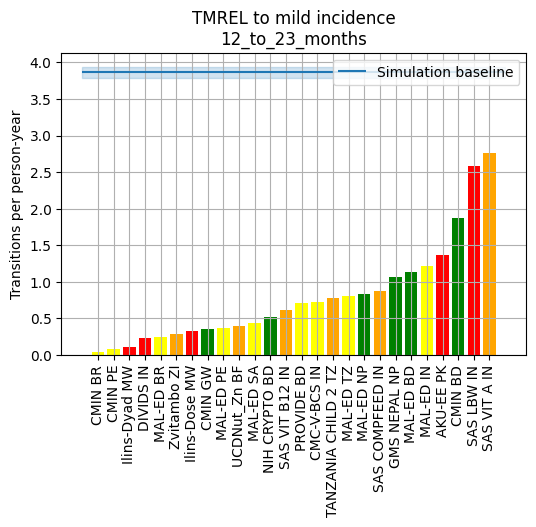

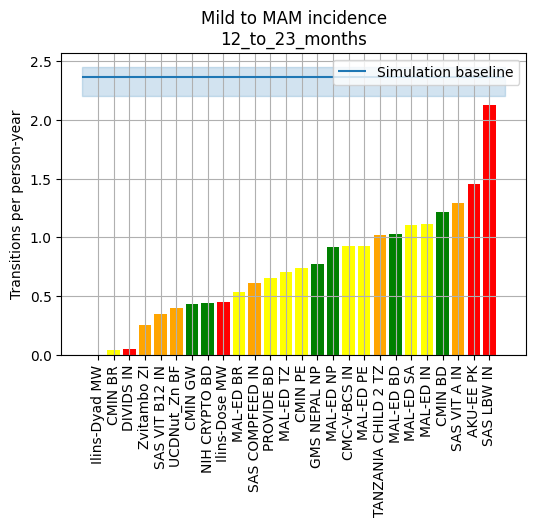

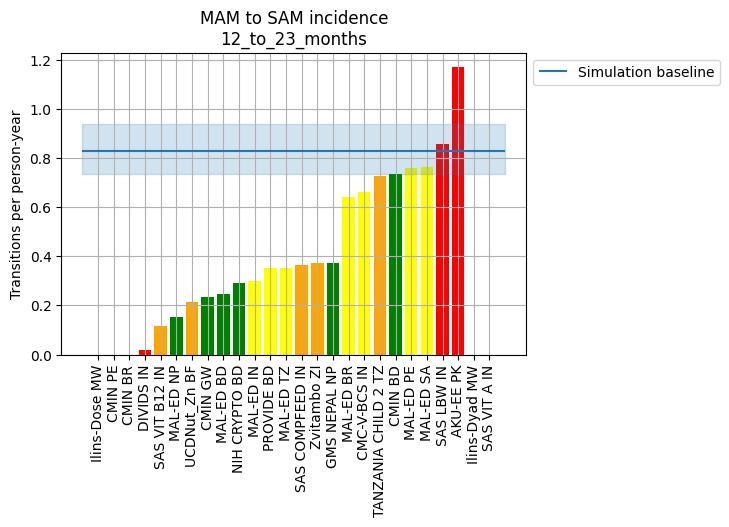

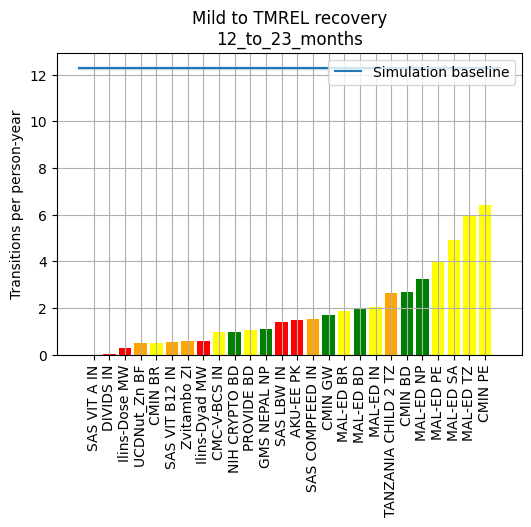

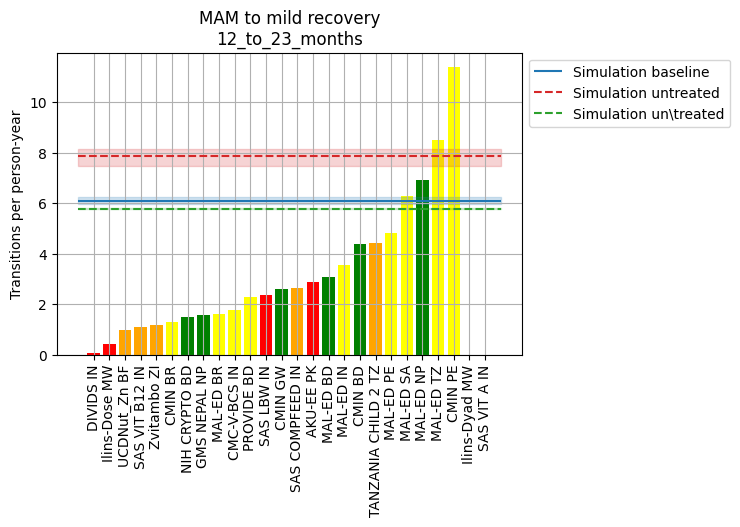

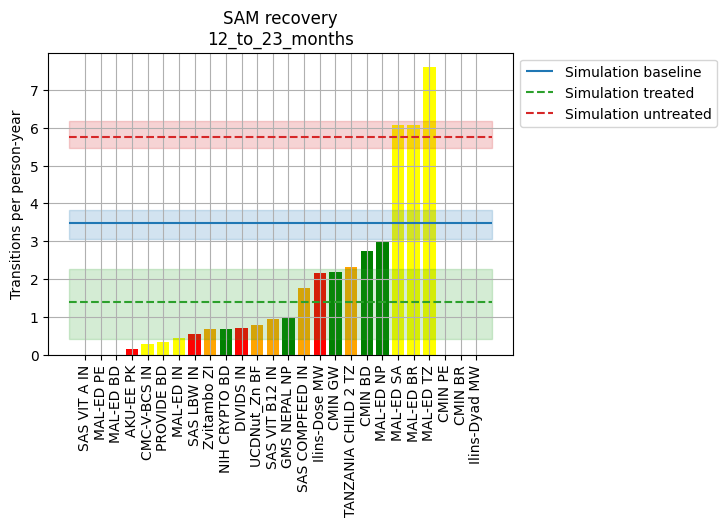

In [93]:
ki_transitions = ['i_none_all','i_mild_all','i_mod_severe',
              'r_mild_non',
                  'r_moderate_all',
                  'r_severe_all'
                 ]
age_group = '12_to_23_months'

for trans in ki_transitions:
    
    if trans == 'i_none_all':
        sim_rate = 'susceptible_to_child_wasting_to_mild_child_wasting_event_count'
        title = 'TMREL to mild incidence'
    elif trans == 'i_mild_all':
        sim_rate = 'mild_child_wasting_to_moderate_acute_malnutrition_event_count'
        title = 'Mild to MAM incidence'
    elif trans == 'i_mod_severe':
        sim_rate = 'moderate_acute_malnutrition_to_severe_acute_malnutrition_event_count'
        title = 'MAM to SAM incidence'
    elif trans == 'r_mild_non':
        sim_rate = 'mild_child_wasting_to_susceptible_to_child_wasting_event_count'
        title = 'Mild to TMREL recovery'
    elif trans == 'r_moderate_all':
        sim_rate = 'moderate_acute_malnutrition_to_mild_child_wasting_event_count'
        title = 'MAM to mild recovery'
    elif trans == 'r_severe_all':
        sim_rate = 'all_sam'
        title = 'SAM recovery'
    
    
    plt.figure(dpi=100)
    p = ki.loc[ki.age_group=='1 to 4 years'].sort_values(by=trans)
    a = np.arange(len(p))
    plt.bar(a, p[f'{trans}']*365, color=p['color'])  
    
    s = sim.loc[(sim.age==age_group)
               &(sim.sink_state==sim_rate)
               &(sim.sam_k=='alternative')]
    plt.hlines(s['value','mean'],a.min()-1,a.max()+1, color='tab:blue', label='Simulation baseline')
    plt.fill_between([a.min()-1,a.max()+1],
                     [s['value','2.5%'].values[0],s['value','2.5%'].values[0]],
                     [s['value','97.5%'].values[0],s['value','97.5%'].values[0]],
                    alpha=0.2, color='tab:blue')
    
    if trans == 'r_moderate_all':
        
        ux = mam_r_ux.loc[(mam_r_ux.sam_k=='alternative')
                         &(mam_r_ux.age==age_group)]
        plt.hlines(ux['value','mean'],a.min()-1,a.max()+1, linestyle='dashed', color='tab:red', label='Simulation untreated')
        plt.fill_between([a.min()-1,a.max()+1],
                     [ux['value','2.5%'].values[0],ux['value','2.5%'].values[0]],
                     [ux['value','97.5%'].values[0],ux['value','97.5%'].values[0]],
                    alpha=0.2, color='tab:red')
    
        tx = mam_r_tx.loc[(mam_r_tx.sam_k=='alternative')
                         &(mam_r_tx.age==age_group)]
        plt.hlines(tx['value','mean'],a.min()-1,a.max()+1, linestyle='dashed', color='tab:green', label='Simulation un\\treated')
        plt.fill_between([a.min()-1,a.max()+1],
                     [tx['value','2.5%'].values[0],tx['value','2.5%'].values[0]],
                     [tx['value','97.5%'].values[0],tx['value','97.5%'].values[0]],
                    alpha=0.2, color='tab:green')
        
    if trans == 'r_severe_all':
        
        ux = sam_r_ux.loc[(sam_r_ux.sam_k=='alternative')
                         &(sam_r_ux.age==age_group)]
        plt.hlines(ux['value','mean'],a.min()-1,a.max()+1, linestyle='dashed', color='tab:green', label='Simulation treated')
        plt.fill_between([a.min()-1,a.max()+1],
                     [ux['value','2.5%'].values[0],ux['value','2.5%'].values[0]],
                     [ux['value','97.5%'].values[0],ux['value','97.5%'].values[0]],
                    alpha=0.2, color='tab:green')
    
        tx = sam_r_tx.loc[(sam_r_tx.sam_k=='alternative')
                         &(sam_r_tx.age==age_group)]
        plt.hlines(tx['value','mean'],a.min()-1,a.max()+1, linestyle='dashed', color='tab:red', label='Simulation untreated')
        plt.fill_between([a.min()-1,a.max()+1],
                     [tx['value','2.5%'].values[0],tx['value','2.5%'].values[0]],
                     [tx['value','97.5%'].values[0],tx['value','97.5%'].values[0]],
                    alpha=0.2, color='tab:red')
    
    plt.xticks(a, p.study_site, rotation=90)
    plt.title(f'{title}\n{age_group}')
    plt.grid()
    plt.legend(bbox_to_anchor=[1,1])
    plt.ylabel('Transitions per person-year')

In [89]:
def plot_incidence_rates(ki_age, sim_age):
    p = ki.loc[(ki.age_group==ki_age)
              &(ki.study_site.isin(green_studies))]
    plt.figure(dpi=120)
    plt.boxplot([p.i_none_all*365,p.i_mild_all*365,p.i_mod_severe.dropna()*365])
    plt.xticks([1,2,3],['Suceptible to more severe','Mild to AM','MAM to SAM'])
    plt.title(f'Wasting incidence rates per person-year\n{sim_age}\nSubset of KI studies most similar to Ethiopia')

    s = sim.loc[(sim.age==sim_age)&(sim.sam_k=='baseline')]

    locs = [1,2,3]
    sinks = ['susceptible_to_child_wasting_to_mild_child_wasting_event_count',
             'mild_child_wasting_to_moderate_acute_malnutrition_event_count',
             'moderate_acute_malnutrition_to_severe_acute_malnutrition_event_count']

    for i in [0,1,2]:
        if i ==0:
            plt.scatter(i+1,s.loc[(s.sink_state==sinks[i])]['value','mean'],
                   s=50, color='tab:blue', label='Simulation')
        else:
            plt.scatter(i+1,s.loc[(s.sink_state==sinks[i])]['value','mean'],
                   s=50, color='tab:blue')
        plt.plot([i+1,i+1],[s.loc[(s.sink_state==sinks[i])]['value','2.5%'],
                       s.loc[(s.sink_state==sinks[i])]['value','97.5%']],
                color='black')


    s = sim.loc[(sim.age==sim_age)&(sim.sam_k=='alternative')]

    locs = [1,2,3]
    sinks = ['susceptible_to_child_wasting_to_mild_child_wasting_event_count',
             'mild_child_wasting_to_moderate_acute_malnutrition_event_count',
             'moderate_acute_malnutrition_to_severe_acute_malnutrition_event_count']

    for i in [0,1,2]:
        if i ==0:
            plt.scatter(i+1,s.loc[(s.sink_state==sinks[i])]['value','mean'],
                   s=50, color='tab:orange', label='k=3.5')
        else:
            plt.scatter(i+1,s.loc[(s.sink_state==sinks[i])]['value','mean'],
                   s=50, color='tab:orange')
        plt.plot([i+1,i+1],[s.loc[(s.sink_state==sinks[i])]['value','2.5%'],
                       s.loc[(s.sink_state==sinks[i])]['value','97.5%']],
                color='black')

    plt.legend()
    plt.grid()
    plt.ylabel('Transitions per person-year')

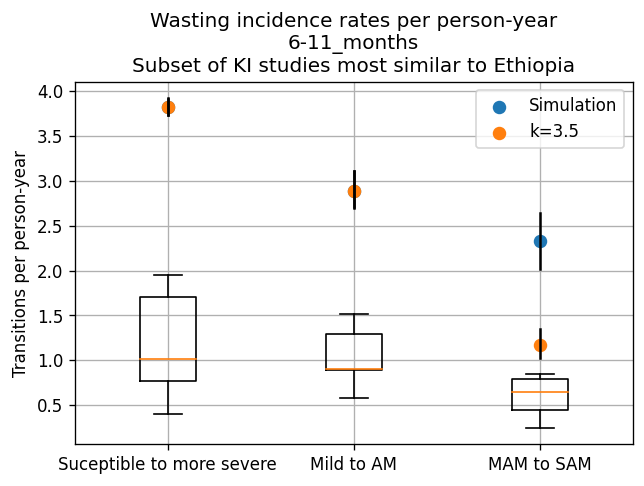

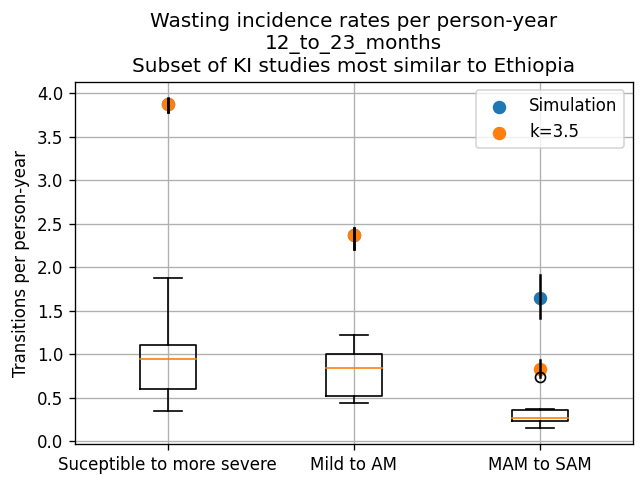

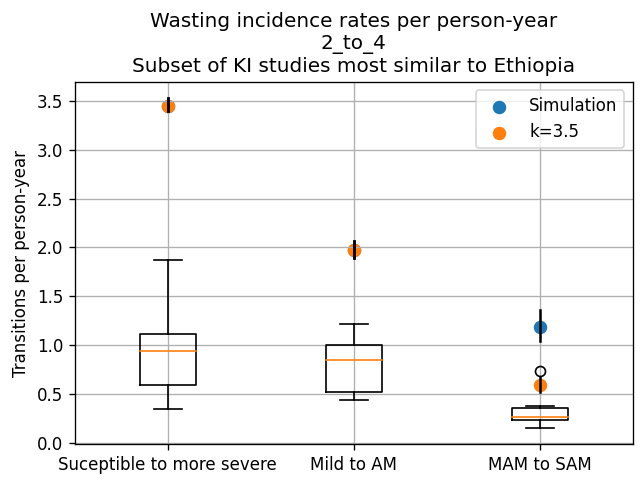

In [86]:
plot_incidence_rates('6 to 12 months', '6-11_months')
plot_incidence_rates('1 to 4 years', '12_to_23_months')
plot_incidence_rates('1 to 4 years', '2_to_4')

In [83]:
def plot_remission_rates(ki_age, sim_age):
    p = ki.loc[(ki.age_group==ki_age)
              &(ki.study_site.isin(green_studies))]
    plt.figure(dpi=120)
    plt.boxplot([p.r_severe_all.dropna()*365,p.r_moderate_all.dropna()*365,p.r_mild_non*365])
    plt.xticks([1,2,3],['SAM to less severe','MAM to less severe','Mild to Susceptible'])
    plt.title(f'Wasting remission rates per person-year\n{sim_age}\nSubset of KI studies most similar to Ethiopia')

    s = sim.loc[(sim.age==sim_age)&(sim.sam_k=='baseline')]

    sinks = ['moderate_acute_malnutrition_to_mild_child_wasting_event_count',
             'mild_child_wasting_to_susceptible_to_child_wasting_event_count']

    for i in [0,1]:

        plt.plot([i+2.2,i+2.2],[s.loc[(s.sink_state==sinks[i])]['value','2.5%'],
                       s.loc[(s.sink_state==sinks[i])]['value','97.5%']],
                color='black')
        if i ==0:
            plt.scatter(i+2.2,s.loc[(s.sink_state==sinks[i])]['value','mean'],
                   s=50, color='tab:blue',label='Simulation (baseline K)')
        else:
            plt.scatter(i+2.2,s.loc[(s.sink_state==sinks[i])]['value','mean'],
                   s=50, color='tab:blue')

    plt.plot([1.2,1.2],[s.loc[(s.sink_state=='severe_acute_malnutrition_to_mild_child_wasting_event_count')]['value','2.5%'],
                   s.loc[(s.sink_state=='severe_acute_malnutrition_to_mild_child_wasting_event_count')]['value','97.5%']],
            color='black')
    plt.scatter(1.2,s.loc[(s.sink_state=='severe_acute_malnutrition_to_mild_child_wasting_event_count')]['value','mean'],
               s=50, color='tab:blue',label='Treated (to mild)',marker='+')

    plt.plot([1.3,1.3],[s.loc[(s.sink_state=='severe_acute_malnutrition_to_moderate_acute_malnutrition_event_count')]['value','2.5%'],
                   s.loc[(s.sink_state=='severe_acute_malnutrition_to_moderate_acute_malnutrition_event_count')]['value','97.5%']],
            color='black')
    plt.scatter(1.3,s.loc[(s.sink_state=='severe_acute_malnutrition_to_moderate_acute_malnutrition_event_count')]['value','mean'],
               s=50, color='tab:blue',label='Untreated (to MAM)',
               marker='*')


    s = sim.loc[(sim.age==sim_age)&(sim.sam_k=='alternative')]

    sinks = [
             'moderate_acute_malnutrition_to_mild_child_wasting_event_count',
             'mild_child_wasting_to_susceptible_to_child_wasting_event_count']

    for i in [0,1]:

        plt.plot([i+2.2,i+2.2],[s.loc[(s.sink_state==sinks[i])]['value','2.5%'],
                       s.loc[(s.sink_state==sinks[i])]['value','97.5%']],
                color='black')
        if i ==0:
            plt.scatter(i+2.2,s.loc[(s.sink_state==sinks[i])]['value','mean'],
                   s=50, color='tab:orange',label='Simulation (alternative K)')
        else:
            plt.scatter(i+2.2,s.loc[(s.sink_state==sinks[i])]['value','mean'],
                   s=50, color='tab:orange')

    plt.plot([1.2,1.2],[s.loc[(s.sink_state=='severe_acute_malnutrition_to_mild_child_wasting_event_count')]['value','2.5%'],
                   s.loc[(s.sink_state=='severe_acute_malnutrition_to_mild_child_wasting_event_count')]['value','97.5%']],
            color='black')
    plt.scatter(1.2,s.loc[(s.sink_state=='severe_acute_malnutrition_to_mild_child_wasting_event_count')]['value','mean'],
               s=50, color='tab:orange',label='Treated (to mild)',marker='+')

    plt.plot([1.3,1.3],[s.loc[(s.sink_state=='severe_acute_malnutrition_to_moderate_acute_malnutrition_event_count')]['value','2.5%'],
                   s.loc[(s.sink_state=='severe_acute_malnutrition_to_moderate_acute_malnutrition_event_count')]['value','97.5%']],
            color='black')
    plt.scatter(1.3,s.loc[(s.sink_state=='severe_acute_malnutrition_to_moderate_acute_malnutrition_event_count')]['value','mean'],
               s=50, color='tab:orange',label='Untreated (to MAM)',
               marker='*')

    plt.grid()
    plt.legend(bbox_to_anchor=[1,1])
    plt.ylabel('Transitions per person-year')

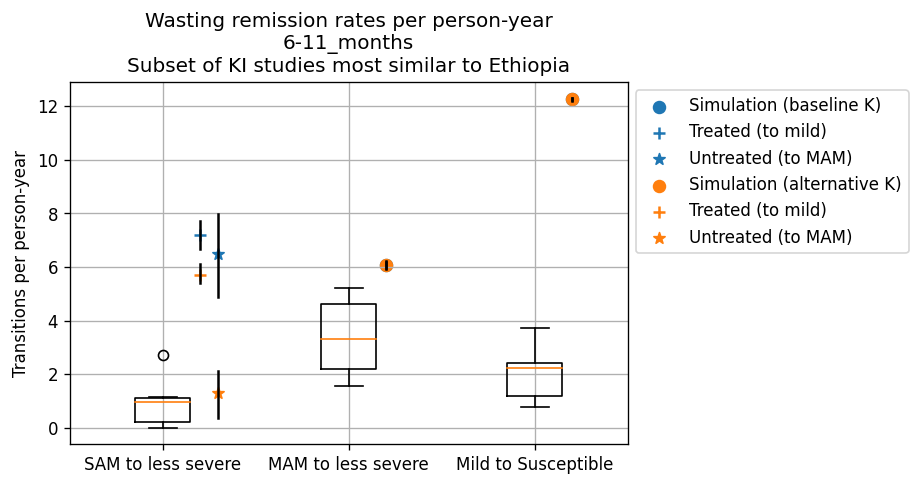

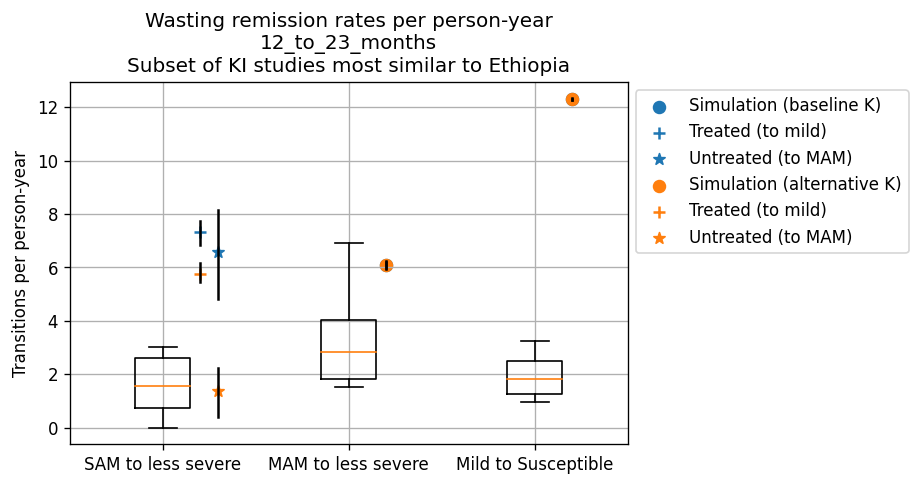

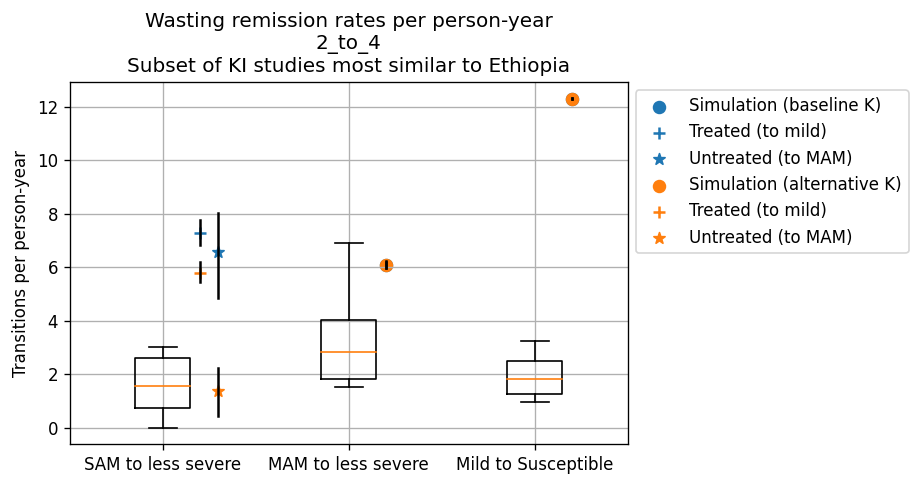

In [84]:
plot_remission_rates('6 to 12 months', '6-11_months')
plot_remission_rates('1 to 4 years', '12_to_23_months')
plot_remission_rates('1 to 4 years', '2_to_4')

In [82]:
# calculate mild to susceptible transition (in person-days) to inform wasting simulation model
# among green study sites

ki.loc[ki.color=='green'].groupby(['age_group']).describe(percentiles=[0.025,0.975])[['r_mild_non']]

r_mild_non                                                    \
                    count      mean       std       min      2.5%       50%   
age_group                                                                     
1 to 4 years          6.0  0.005336  0.002428  0.002681  0.002723  0.005043   
1 to 5 months         6.0  0.012845  0.006624  0.003559  0.004354  0.011647   
6 to 12 months        6.0  0.005601  0.003015  0.002149  0.002168  0.006140   
<27 days              5.0  0.000341  0.000762  0.000000  0.000000  0.000000   

                                    
                   97.5%       max  
age_group                           
1 to 4 years    0.008700  0.008895  
1 to 5 months   0.022208  0.022895  
6 to 12 months  0.009732  0.010164  
<27 days        0.001533  0.001704